**1. Data Reading**

In [1]:
import pandas as pd
import numpy as np

pd.set_option('max_columns', None)
train_data = pd.read_csv('Material_Database.csv', index_col=0)
train_data.head(10)

,Unnamed: 1,Hardness(all),Hardness(few),C_Mean,C_Range,Mn_Mean,Mn_Range,P_Max,S_Max,Si_Mean,Si_Range,Ni_Mean,Ni_Range,Cr_Mean,Cr_Range,Mo_Mean,Mo_Range,B_Mean,B_Range,N_Mean,N_Range,V_Mean,V_Range,Nb_Mean,Nb_Range,E,Ef,K,Nc,Sf,UTS,YS,b,c,n,Unnamed: 36
1,Austenitic Stainless Steel BS970 Grade 349S52,200,0,0.53,0.05,9.000,1.000,0.040,0.03,0.125,0.125,1.625,-1.625,10.0,-10.0,0.00,0.00,0.000,0.000,0.44,0.06,0.00,0.00,0.00,0.00,190000.0,0.068,2039.0,20000000.0,1192.0,991.0,622.0,-0.073,-0.374,0.218,0.627649
2,Austenitic Stainless Steel BS970 Grade 352S52,200,0,0.53,0.05,9.000,1.000,0.040,0.03,0.125,0.125,1.625,-1.625,10.0,-10.0,0.00,0.00,0.000,0.000,0.44,0.06,0.00,0.00,0.00,0.00,174000.0,0.389,2564.0,20000000.0,1586.0,1027.0,725.0,-0.108,-0.541,0.229,0.705940
3,C - Mn Steel SAE1522_289_HR,289,289,0.21,0.03,1.250,0.150,1.400,0.05,0.000,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,207000.0,0.070,2118.0,200000000.0,1253.0,1005.0,902.0,-0.080,-0.360,0.200,0.897512
4,C - Mn Steel SAE1522_304_HR,304,304,0.21,0.03,1.250,0.150,1.400,0.05,0.000,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,207000.0,0.280,2278.0,200000000.0,1464.0,1088.0,1005.0,-0.080,-0.510,0.190,0.923713
5,C - Mn Steel SAE1541_362_QT,362,362,0.40,0.04,1.500,0.150,1.650,0.05,0.000,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,207000.0,0.680,1613.0,200000000.0,2980.0,1200.0,1096.0,-0.150,-0.610,0.120,0.913333
6,C - Mn Steel SAE1561_234_HR,234,234,0.60,0.05,0.900,0.150,1.050,0.05,0.000,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,207000.0,0.530,1448.0,200000000.0,1278.0,836.0,447.0,-0.110,-0.540,0.190,0.534689
7,Carbon Steel RQT501,200,0,0.10,0.10,0.800,0.800,0.025,0.01,0.300,0.300,0.500,0.500,0.0,0.0,0.30,0.30,0.000,0.000,0.00,0.00,0.05,0.05,0.00,0.00,200000.0,0.202,1102.3,20000000.0,892.0,590.0,472.0,-0.089,-0.504,0.165,0.800000
8,Carbon Steel RQT701,200,0,0.10,0.10,0.800,0.800,0.020,0.01,0.250,0.250,0.750,0.750,0.5,0.5,0.35,0.35,0.002,0.002,0.00,0.00,0.04,0.04,0.03,0.03,200000.0,2.084,1048.6,20000000.0,955.1,825.0,735.0,-0.063,-0.790,0.105,0.890909
9,Carbon Steel SAE1006_85A_HR,200,0,0.04,0.04,0.325,0.075,0.400,0.05,0.000,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,207000.0,0.480,1352.0,200000000.0,802.0,318.0,248.0,-0.120,-0.520,0.280,0.779874
10,Carbon Steel SAE1006_85B_HR,200,0,0.04,0.04,0.325,0.075,0.400,0.05,0.000,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,207000.0,1.220,813.0,200000000.0,756.0,318.0,248.0,-0.130,-0.670,0.210,0.779874


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

train_data = shuffle(train_data)

X = train_data.drop(['UTS'], axis=1)
y = train_data['UTS']

print(X.shape)
print(y.shape)
# Break off validation set from training data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, test_size=0.2,
                                                    shuffle=False,
                                                    random_state=0)

(133, 35)
(133,)


In [3]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [4]:
#Checking for NaN
nulls_train = np.sum(train_data.isnull())
nullcols_train = nulls_train.loc[(nulls_train != 0)].sort_values(ascending=False)
nullcols_train = nullcols_train.apply(lambda x: 100*x/train_data.shape[0])
nullcols_train

Series([], dtype: int64)

In [5]:
#Checking for NaN
nulls_train = np.sum(test_data.isnull())
nullcols_train = nulls_train.loc[(nulls_train != 0)].sort_values(ascending=False)
nullcols_train = nullcols_train.apply(lambda x: 100*x/test_data.shape[0])
nullcols_train

Series([], dtype: int64)

**2. EDA**

In [6]:
features = ['C_Mean', 'Mn_Mean', 'P_Max', 'S_Max', 'Si_Mean', 'Ni_Mean', 'Cr_Mean', 'Mo_Mean','B_Mean',
            'N_Mean', 'V_Mean', 'Nb_Mean']
label = ['UTS']

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import math

def scatter_plot_inference_grid(df, label, feature_names):
  """Plots the predictions of the model against each feature.
  
  Args:
    label: The label again which to see trend.
    df: The pandas dataframe with the input data
    feature_names: An iterable of string feature names to plot.
  """
  def scatter_plot_inference(axis,
                             x_axis_feature_name,
                             y_axis_feature_name):
    """Generate one subplot."""
    axis.set_ylabel(y_axis_feature_name)
    axis.set_xlabel(x_axis_feature_name)
    axis.scatter(df[x_axis_feature_name],
                 df[y_axis_feature_name],
                 c='orange')
  
  num_cols = 3
  num_rows = int(math.ceil(len(feature_names)/float(num_cols)))
  f, axarr = plt.subplots(num_rows, num_cols)
  size = 4.5
  f.set_size_inches(num_cols*size, num_rows*size)
  
  for i, feature_name in enumerate(feature_names):
    axis = axarr[int(i/num_cols), i%num_cols]
    scatter_plot_inference(axis, feature_name, label)
  plt.show()

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

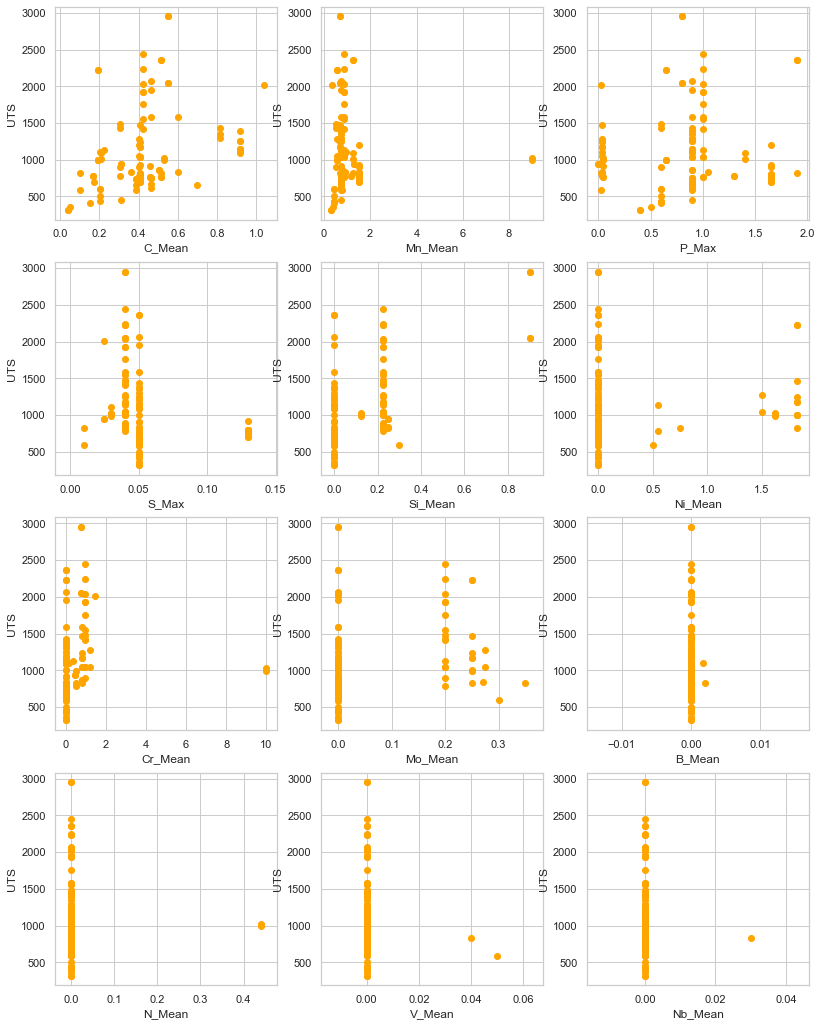

In [9]:
scatter_plot_inference_grid(train_data, label[0], features)

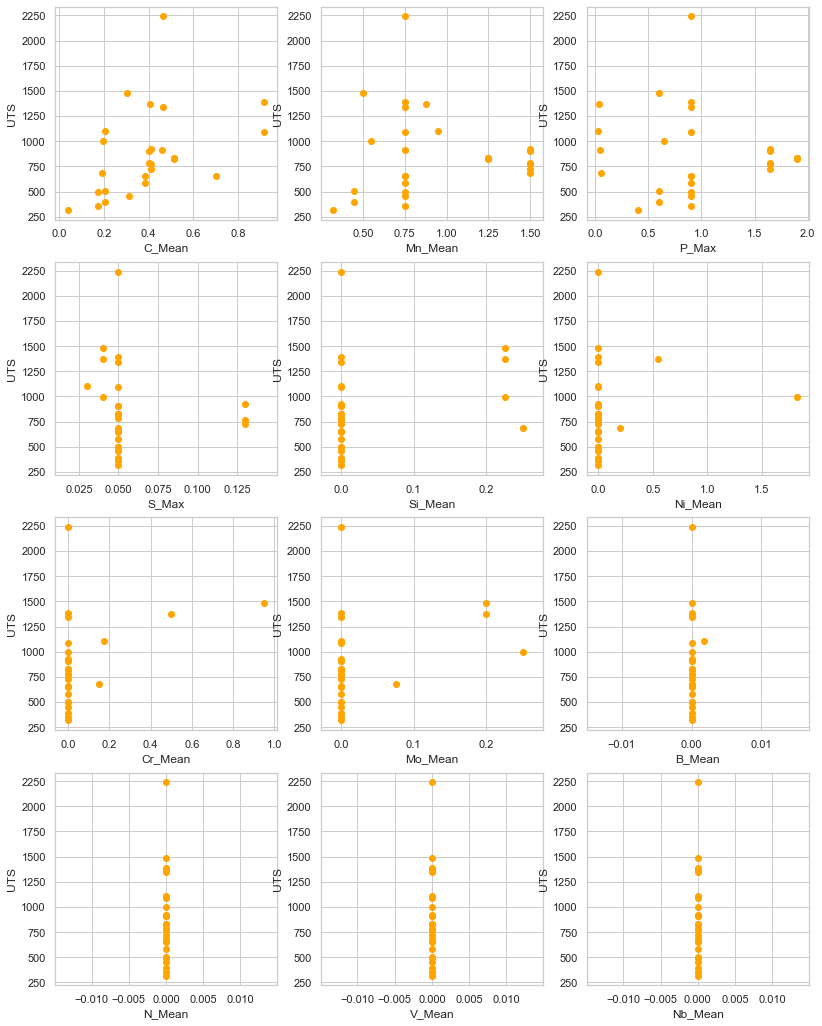

In [10]:
scatter_plot_inference_grid(test_data, label[0], features)

**3. Feature Selection & Removing Bias**

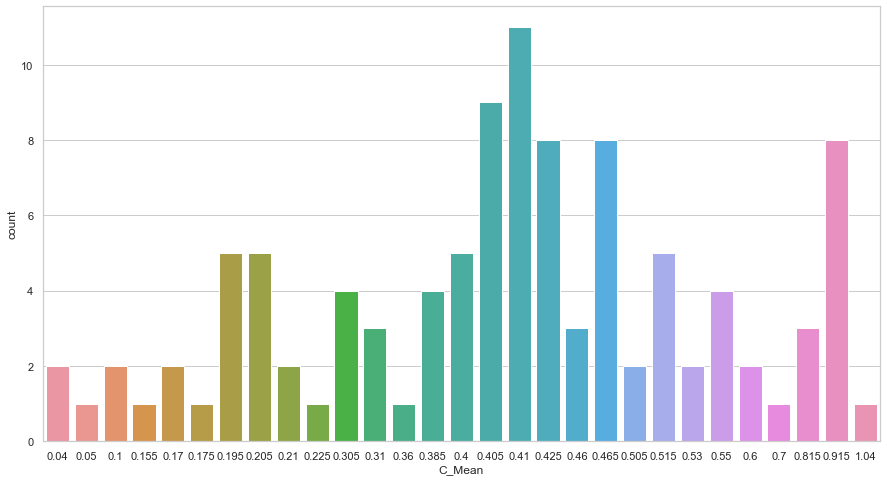

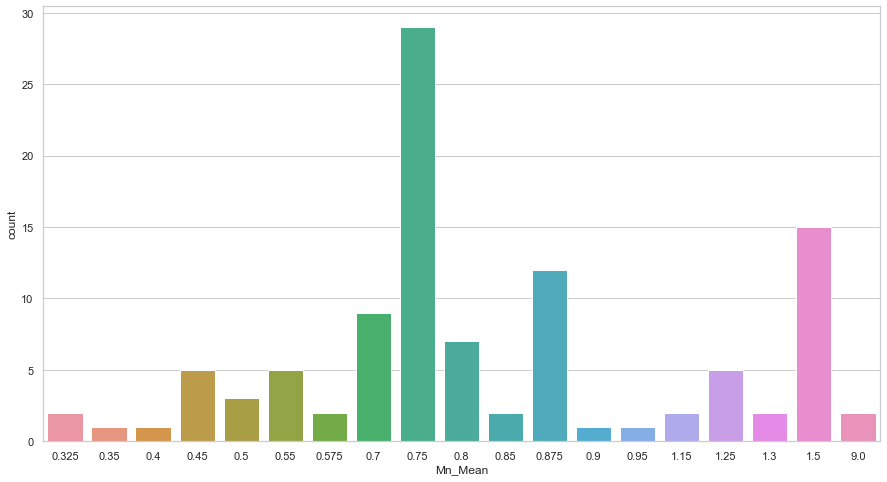

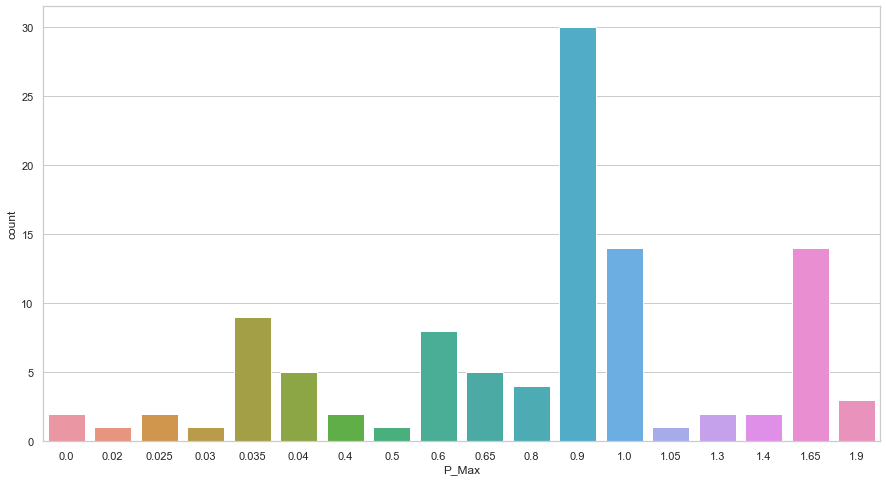

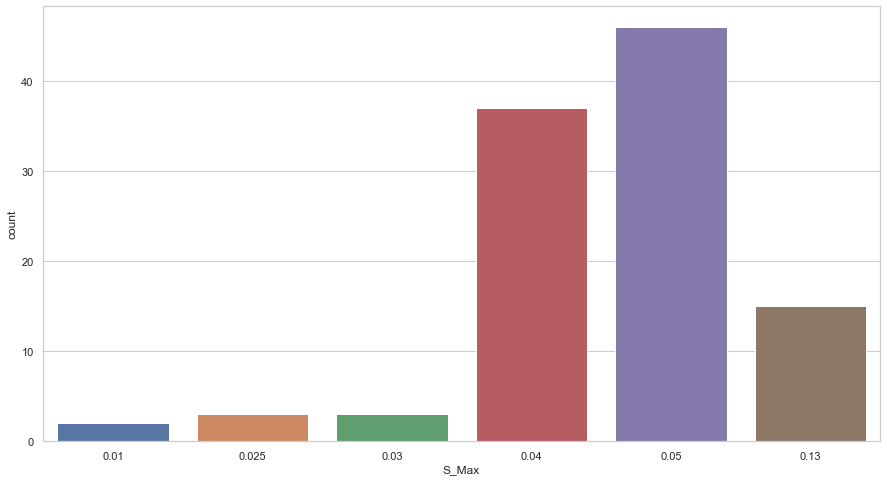

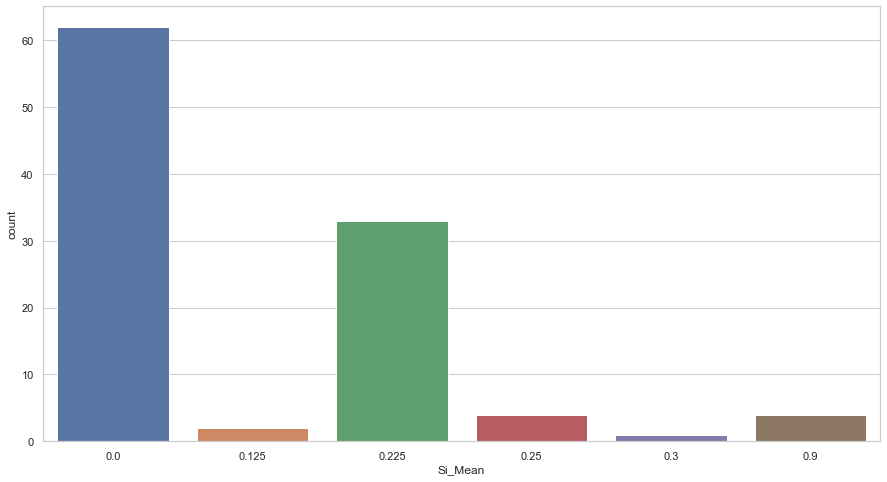

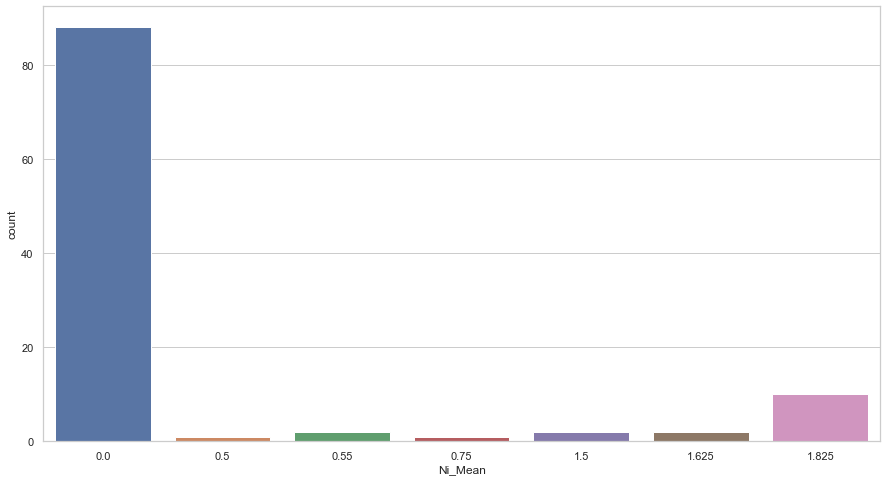

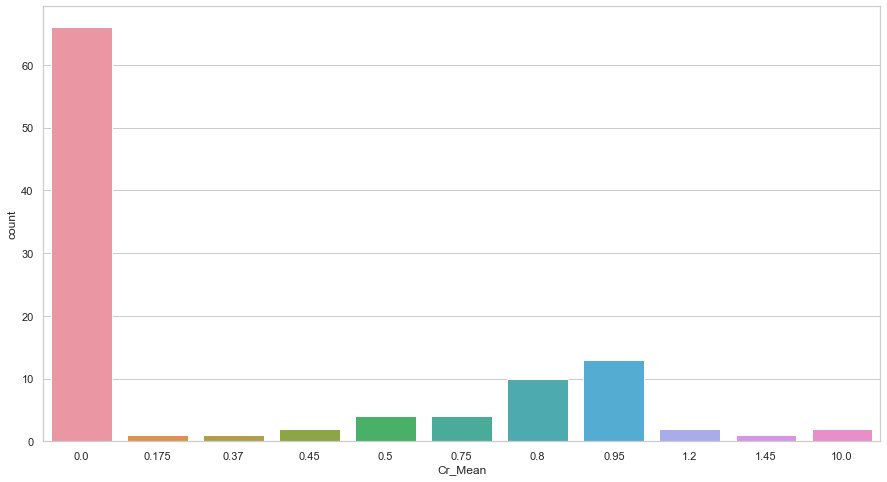

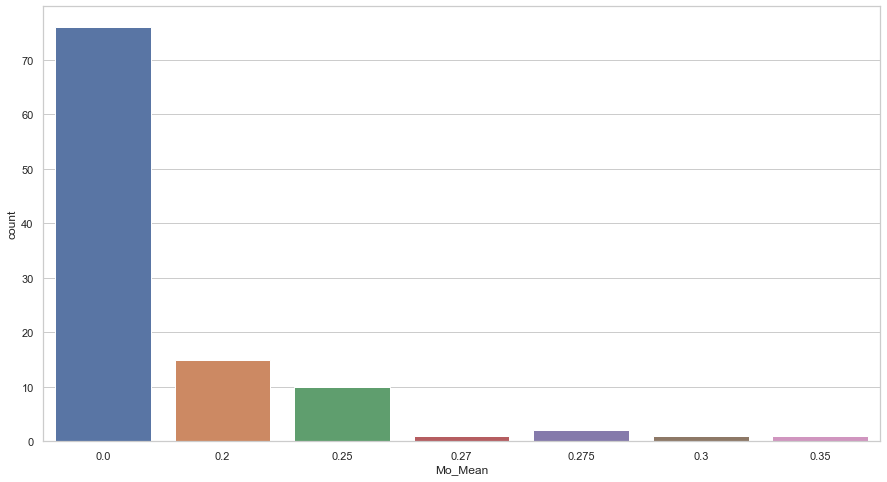

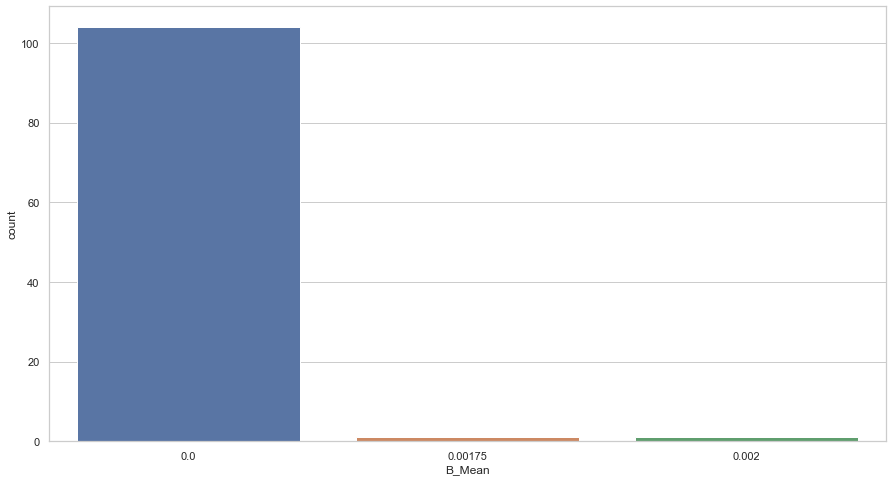

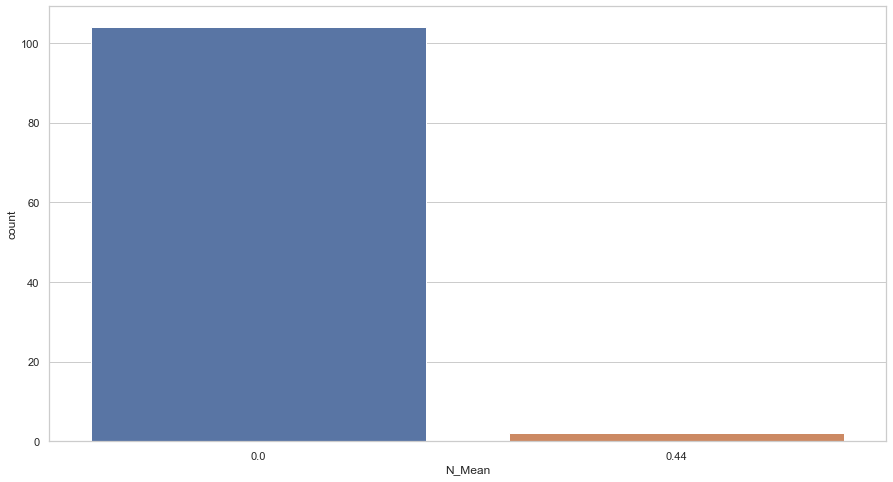

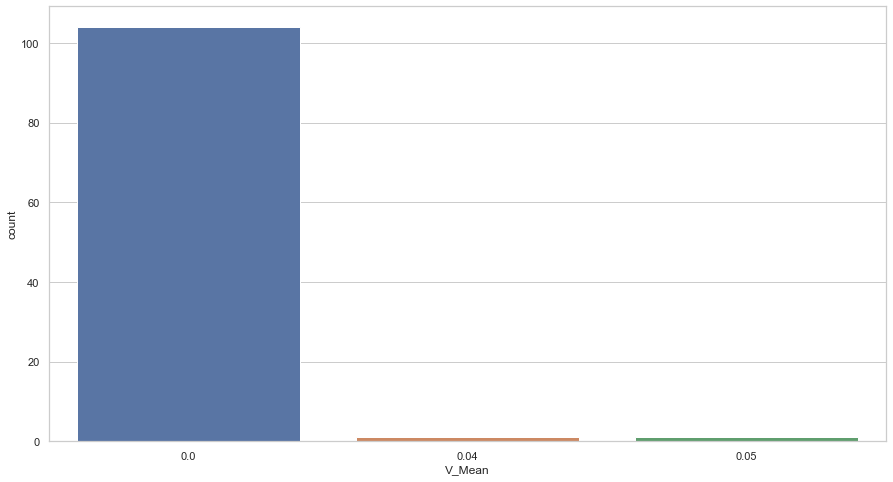

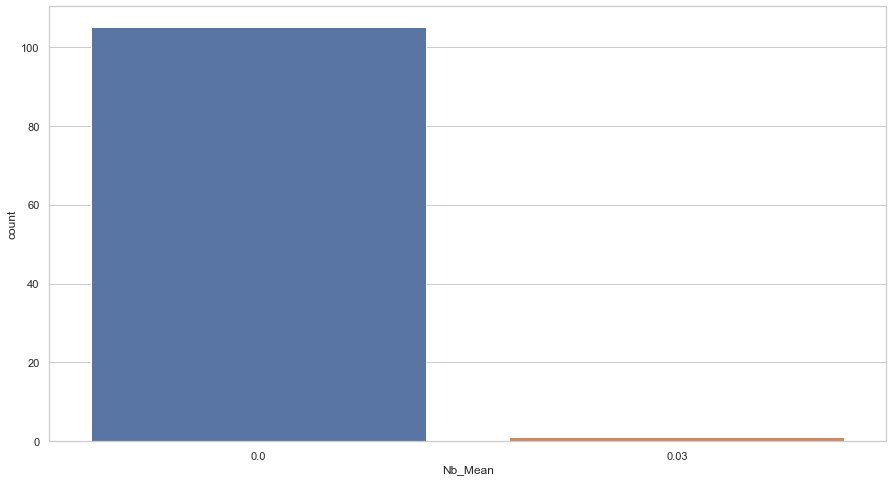

In [11]:
for i in features:
    barplot_dim = (15, 8)
    ax = plt.subplots(figsize=barplot_dim)
    sns.countplot(x=i, data=train_data)

In [12]:
for col in features:
    print('In Training Data:-')
    print(train_data[col].value_counts())
    print('\n')
    print('In Test Data:-')
    print(test_data[col].value_counts())
    print('\n')
    print('----------------------')

In Training Data:-
0.410    11
0.405     9
0.915     8
0.425     8
0.465     8
0.515     5
0.400     5
0.195     5
0.205     5
0.385     4
0.305     4
0.550     4
0.815     3
0.460     3
0.310     3
0.530     2
0.040     2
0.170     2
0.100     2
0.600     2
0.210     2
0.505     2
0.360     1
1.040     1
0.175     1
0.050     1
0.700     1
0.155     1
0.225     1
Name: C_Mean, dtype: int64


In Test Data:-
0.205    3
0.515    3
0.410    3
0.915    2
0.175    2
0.400    2
0.385    2
0.465    2
0.040    1
0.195    1
0.700    1
0.310    1
0.405    1
0.305    1
0.190    1
0.460    1
Name: C_Mean, dtype: int64


----------------------
In Training Data:-
0.750    29
1.500    15
0.875    12
0.700     9
0.800     7
0.550     5
0.450     5
1.250     5
0.500     3
1.300     2
0.325     2
0.850     2
1.150     2
0.575     2
9.000     2
0.900     1
0.350     1
0.400     1
0.950     1
Name: Mn_Mean, dtype: int64


In Test Data:-
0.750    11
1.500     6
1.250     3
0.450     2
0.325     1
0.550    

In [13]:
# drop_features = ['B_Mean', 'N_Mean', 'V_Mean', 'Nb_Mean']

# train_data.drop(drop_features, axis=1, inplace=True)
# test_data.drop(drop_features, axis=1, inplace=True)
# pd.set_option('max_columns', None)
# train_data.head(10)

In [14]:
# for i in drop_features:
#     features.remove(i)
# print(features)

In [15]:
for col in train_data.columns:
    if (not (col in features)) and (not (col in label)):
        train_data.drop(col, axis=1, inplace=True)
        test_data.drop(col, axis=1, inplace=True)

In [16]:
pd.set_option('max_columns', None)
train_data.head(10)

,C_Mean,Mn_Mean,P_Max,S_Max,Si_Mean,Ni_Mean,Cr_Mean,Mo_Mean,B_Mean,N_Mean,V_Mean,Nb_Mean,UTS
92,0.170,1.150,1.300,0.13,0.000,0.000,0.00,0.00,0.0,0.00,0.0,0.0,777.0
12,0.050,0.400,0.500,0.05,0.000,0.000,0.00,0.00,0.0,0.00,0.0,0.0,363.0
72,0.515,1.250,1.900,0.05,0.000,0.000,0.00,0.00,0.0,0.00,0.0,0.0,2360.0
99,0.410,1.500,1.650,0.13,0.000,0.000,0.00,0.00,0.0,0.00,0.0,0.0,801.8
9,0.040,0.325,0.400,0.05,0.000,0.000,0.00,0.00,0.0,0.00,0.0,0.0,318.0
1,0.530,9.000,0.040,0.03,0.125,1.625,10.00,0.00,0.0,0.44,0.0,0.0,991.0
108,0.515,0.850,1.000,0.13,0.000,0.000,0.00,0.00,0.0,0.00,0.0,0.0,760.8
48,0.405,0.700,0.035,0.04,0.225,1.825,0.80,0.25,0.0,0.00,0.0,0.0,826.0
115,0.305,0.500,0.600,0.04,0.225,0.000,0.95,0.20,0.0,0.00,0.0,0.0,1482.8
57,0.205,0.450,0.600,0.05,0.000,0.000,0.00,0.00,0.0,0.00,0.0,0.0,604.1


In [17]:
pd.set_option('max_columns', None)
test_data.head(10)

,C_Mean,Mn_Mean,P_Max,S_Max,Si_Mean,Ni_Mean,Cr_Mean,Mo_Mean,B_Mean,N_Mean,V_Mean,Nb_Mean,UTS
116,0.305,0.50,0.60,0.04,0.225,0.0,0.950,0.2,0.00000,0.0,0.0,0.0,1482.8
67,0.515,1.25,1.90,0.05,0.000,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,828.5
94,0.410,1.50,1.65,0.13,0.000,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,924.8
89,0.460,0.75,0.04,0.05,0.000,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,908.6
85,0.205,0.95,0.03,0.03,0.000,0.0,0.175,0.0,0.00175,0.0,0.0,0.0,1104.8
56,0.205,0.45,0.60,0.05,0.000,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,502.2
22,0.465,0.75,0.90,0.05,0.000,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,1343.0
64,0.385,0.75,0.90,0.05,0.000,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,651.6
103,0.410,1.50,1.65,0.13,0.000,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,725.2
74,0.700,0.75,0.90,0.05,0.000,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,659.0


**4. Model:- Neural Network**

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
import time
from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


In [19]:
train_data = shuffle(train_data)

y = train_data[label]
X = train_data[features]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, test_size=0.25,
                                                      random_state=0)

In [20]:
EPOCHS = 300
BATCH_SIZE = 32
NAME = f'UTS_Predict_{BATCH_SIZE}_batchsize_{int(time.time())}'

model = Sequential()

model.add(Dense(128, input_dim =X_train.shape[1], kernel_initializer='normal', activation='relu'))

model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal', activation='linear'))

opt = tf.keras.optimizers.Adam(lr= 0.001,
                               decay= 1e-6)
model.compile(loss= 'mean_absolute_error',
              optimizer= opt,
              metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1664      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 100,737
Trainable params: 100,737
Non-trainable params: 0
_________________________________________________________________


In [21]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format(NAME))

# unique file name that will include the epoch and the validation acc for that epoch
# checkpoint_name = 'models/Weights_Final-{epoch:02d}-epoch-{val_loss:.5f}-loss.hdf5'
# saves only the best ones
# checkpoint = ModelCheckpoint(checkpoint_name,
#                              monitor='val_loss',
#                              verbose = 0,
#                              save_best_only = True,
#                              mode ='auto')
callbacks_list = [tensorboard, TQDMNotebookCallback()]

In [22]:
model.fit(X_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks_list,
          verbose=0)

In [23]:
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])

Test loss: 218.61895751953125


**4.1 Hyper-Prameter Tuning**

In [24]:
# from tqdm.notebook import trange, tqdm

# dense_layers = [1,2,3]
# layer_sizes = [64, 128, 256]
# batch_sizes = [16, 32, 64]

# opt = tf.keras.optimizers.Adam(lr= 0.001,
#                                decay= 1e-6)
# for i in trange(len(dense_layers), desc='Dense Layers:'):
#     dense_layer = dense_layers[i]
#     for j in trange(len(layer_sizes), desc='Layer Sizes:'):
#         layer_size = layer_sizes[j]
#         for k in trange(len(batch_sizes), desc='Batch Sizes:'):
#             batch_size = batch_sizes[k]
#             NAME = "{}-batch-{}-nodes-{}-dense-{}".format(batch_size, layer_size, dense_layer, int(time.time()))

#             model = Sequential()
#             model.add(Dense(layer_size, input_dim =X_train.shape[1], kernel_initializer='normal', activation='relu'))

#             for _ in range(dense_layer):
#                 model.add(Dense(layer_size, kernel_initializer='normal', activation='relu'))
#                 model.add(Dropout(0.1))
#     #                 model.add(BatchNormalization())

#             model.add(Dense(1, kernel_initializer='normal', activation='linear'))
#             model.compile(loss= 'mean_absolute_error',
#                           optimizer= opt,
#                           metrics=['mean_absolute_error'])

#             tensorboard = TensorBoard(log_dir= 'logs\{}'.format(NAME))
#             callbacks_list = [tensorboard]
#             model.fit(X_train, y_train,
#                       epochs=EPOCHS,
#                       batch_size=batch_size,
#                       validation_data=(X_valid, y_valid),
#                       callbacks=callbacks_list,
#                       verbose=0)

Optimum hyper-parameters:-

1. Local Optima:-
    40 Epochs
    64 batch size
    256 nodes
    2 intermediate dense layers
    
2. Global Optima:-
    300 Epochs
    16 batch size
    128 nodes
    2 intermediate dense layers

In [25]:
def prediction_comparison(prediction, actual):
    df = pd.DataFrame()
    df['Prediction'] = prediction
    df['Actual'] = np.array(actual)
    print(df.head())
    sns.lineplot(data=df)

In [26]:
EPOCHS = 300
BATCH_SIZE = 64
NAME = f'UTS_Predict_{BATCH_SIZE}_batchsize_{int(time.time())}'

model = Sequential()

model.add(Dense(256, input_dim =X_train.shape[1], kernel_initializer='normal', activation='relu'))

model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal', activation='linear'))

opt = tf.keras.optimizers.Adam(lr= 0.001,
                               decay= 1e-6)
model.compile(loss= 'mean_absolute_error',
              optimizer= opt,
              metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               3328      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 135,169
Trainable params: 135,169
Non-trainable params: 0
_________________________________________________________________


In [27]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format(NAME))

# unique file name that will include the epoch and the validation acc for that epoch
# checkpoint_name = 'models/Weights_Final-{epoch:02d}-epoch-{val_loss:.5f}-loss.hdf5'
# saves only the best ones
# checkpoint = ModelCheckpoint(checkpoint_name,
#                              monitor='val_loss',
#                              verbose = 0,
#                              save_best_only = True,
#                              mode ='auto')
callbacks_list = [tensorboard, TQDMNotebookCallback()]

In [28]:
model.fit(X_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks_list,
          verbose=0)

In [29]:
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])

Test loss: 222.28298950195312


In [30]:
call_backs_tqdm = [TQDMNotebookCallback()]
model.fit(X, y,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=call_backs_tqdm,
          verbose=0)

preds = model.predict(test_data[features])

    Prediction  Actual
0  1431.866455  1482.8
1  1045.735474   828.5
2   803.864075   924.8
3   648.503052   908.6
4   421.925415  1104.8


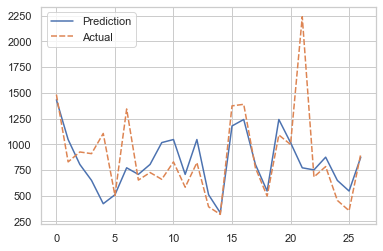

In [32]:
prediction_comparison(preds.reshape((1, 27)).tolist()[0], test_data[label])